In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Set data directory
data_directory = '/Users/emilyperelman/Desktop/DISfINAL/Neural-Networks-Final-Project/Data/Training'
#https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

batch_size = 32
img_height, img_width = 150, 150

# Create a dataset from the directory
train_dataset = image_dataset_from_directory(
    data_directory,
    labels='inferred', #labels are generated from directory structure
    label_mode='categorical',
    # color_mode='rgb',
    batch_size=batch_size, #size of batch of data
    image_size=(img_height, img_width), #resizing image
    # shuffle=True,
    seed=123,
    validation_split=0.15,
    subset='training'
)

val_dataset = image_dataset_from_directory(
    data_directory,
    labels='inferred',
    label_mode='categorical',
    # color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    # shuffle=True,
    seed=123,
    validation_split=0.15,
    subset='validation'
)

train_X = []
train_Y = []

for images, labels in train_dataset:
    train_X.append(images.numpy())  # Append image batch to train_X
    train_Y.append(labels.numpy())  # Append labels batch to train_Y

train_X = np.concatenate(train_X, axis=0)  # Concatenate batches along axis 0
train_Y = np.concatenate(train_Y, axis=0)  # Concatenate label batches along axis 0


val_X = []
val_Y = []

for images, labels in val_dataset:
    val_X.append(images.numpy())  # Append image batch to val_X
    val_Y.append(labels.numpy())  # Append labels batch to val_Y

val_X = np.concatenate(val_X, axis=0)  # Concatenate batches along axis 0
val_Y = np.concatenate(val_Y, axis=0)


testing_data_directory = '/Users/emilyperelman/Desktop/DISfINAL/Neural-Networks-Final-Project/Data/Testing'

test_dataset = image_dataset_from_directory(
    data_directory,
    labels='inferred',
    label_mode='categorical',
    # color_mode='rgb',
    batch_size=batch_size,  # Use the same batch size as training
    image_size=(img_height, img_width),  # Use the same image dimensions as training
    # shuffle=False,  # No need to shuffle for testing
    seed=123,
    validation_split=None  # No splitting for testing
)

test_X = []
test_Y = []

for images, labels in test_dataset:
    test_X.append(images.numpy())  # Append image batch to test_X
    test_Y.append(labels.numpy())  # Append labels batch to test_Y

test_X = np.concatenate(test_X, axis=0)  # Concatenate batches along axis 0
test_Y = np.concatenate(test_Y, axis=0)



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape = [ 150, 150, 3] ),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy']) #what we did in week 4

# Train the model
history = model.fit(train_X, train_Y, epochs=10, batch_size=batch_size, validation_data=(val_X, val_Y))

# Evaluate the model
#test_loss, test_acc = model.evaluate(test_X, test_Y)
score = model.evaluate(test_X, test_Y)
#print(f"Test Accuracy: {test_acc}")
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2023-12-05 15:59:35.092485: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 5712 files belonging to 4 classes.
Using 4856 files for training.
Found 5712 files belonging to 4 classes.
Using 856 files for validation.
Found 5712 files belonging to 4 classes.
Epoch 1/10
152/152 [==============================] - 73s 473ms/step - loss: 4.8863 - accuracy: 0.6998 - val_loss: 0.4470 - val_accuracy: 0.8435
Epoch 2/10
152/152 [==============================] - 66s 437ms/step - loss: 0.4331 - accuracy: 0.8425 - val_loss: 0.4379 - val_accuracy: 0.8388
Epoch 3/10
152/152 [==============================] - 69s 453ms/step - loss: 0.3682 - accuracy: 0.8729 - val_loss: 0.3335 - val_accuracy: 0.8902
Epoch 4/10
152/152 [==============================] - 67s 442ms/step - loss: 0.2747 - accuracy: 0.9061 - val_loss: 0.2725 - val_accuracy: 0.9159
Epoch 5/10
152/152 [==============================] - 67s 437ms/step - loss: 0.2017 - accuracy: 0.9302 - val_loss: 0.3025 - val_accuracy: 0.9112
Epoch 6/10
152/152 [==============================] - 66s 435ms/step - loss: 0.1555 - acc

179/179 [==============================] - 18s 103ms/step


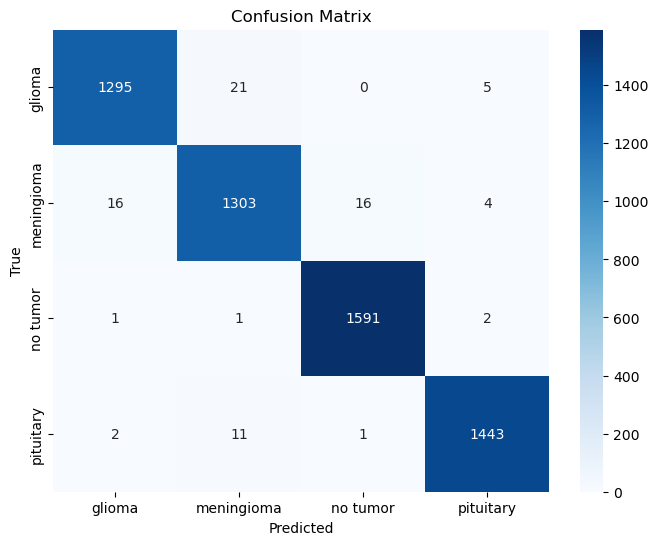

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

## CODE FOR CONFUSION MATRIX
predictions = model.predict(test_X)
true_labels = np.argmax(test_Y, axis=1)  # Convert one-hot encoded labels to categorical

# Get predicted labels by finding the index of the highest probability in predictions
predicted_labels = np.argmax(predictions, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Define class labels
class_labels = ['glioma', 'meningioma', 'no tumor', 'pituitary']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()